In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv("C:/Users/conma/Downloads/archive (5)/seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [157]:
print(df.dtypes)
print(df.isna().sum())

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [159]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
print(df)

           date  precipitation  temp_max  temp_min  wind  weather  month
0    2012-01-01            0.0      12.8       5.0   4.7  drizzle      1
1    2012-01-02           10.9      10.6       2.8   4.5     rain      1
2    2012-01-03            0.8      11.7       7.2   2.3     rain      1
3    2012-01-04           20.3      12.2       5.6   4.7     rain      1
4    2012-01-05            1.3       8.9       2.8   6.1     rain      1
...         ...            ...       ...       ...   ...      ...    ...
1456 2015-12-27            8.6       4.4       1.7   2.9     rain     12
1457 2015-12-28            1.5       5.0       1.7   1.3     rain     12
1458 2015-12-29            0.0       7.2       0.6   2.6      fog     12
1459 2015-12-30            0.0       5.6      -1.0   3.4      sun     12
1460 2015-12-31            0.0       5.6      -2.1   3.5      sun     12

[1461 rows x 7 columns]


In [161]:
df.drop(columns=['date'], inplace = True)
df = df[['month', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']]
df.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain


In [163]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [165]:
df['weather'] = df['weather'].apply(lambda x: 1 if x == 'rain' else 0)
print(df)

      month  precipitation  temp_max  temp_min  wind  weather
0         1            0.0      12.8       5.0   4.7        0
1         1           10.9      10.6       2.8   4.5        1
2         1            0.8      11.7       7.2   2.3        1
3         1           20.3      12.2       5.6   4.7        1
4         1            1.3       8.9       2.8   6.1        1
...     ...            ...       ...       ...   ...      ...
1456     12            8.6       4.4       1.7   2.9        1
1457     12            1.5       5.0       1.7   1.3        1
1458     12            0.0       7.2       0.6   2.6        0
1459     12            0.0       5.6      -1.0   3.4        0
1460     12            0.0       5.6      -2.1   3.5        0

[1461 rows x 6 columns]


In [167]:
X = df.drop(columns=['weather'])
y = df['weather']

In [ ]:
from sklearn.model_selection import train_test_split

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)


In [176]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

bag_clf = BaggingClassifier(oob_score=True, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 500],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=bag_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(oob_score=True, random_state=42),
             param_grid={'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'n_estimators': [50, 100, 500]})

In [210]:
# Bagging Classifier
bag_clf = BaggingClassifier(n_estimators=500, max_samples=0.9, max_features=1.0, oob_score=True, random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

# After many combinations of max features and samples, this had the highest oob score
# samples = 0.9, features = 1.0: .9615

0.961472602739726

In [292]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_samples=0.2, max_features=0.5, oob_score=True, random_state=42)
rf_clf.fit(X_train,y_train)
rf_clf.oob_score_

# After many combinations of parameters, the best oob score used these
# max_samples = 0.2, max_features = 0.5 - .9623

0.9623287671232876

In [378]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators = 1000, learning_rate = 1, algorithm = 'SAMME', random_state=42)
ada_clf.fit(X_train,y_train)
ada_clf.score(X_train, y_train)

# The parameters with the best score is
# n_estrimators = 1000 learning_rate = 1 - .9692

0.9691780821917808

In [470]:
# XGBoost classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, max_depth = 6, eta = 0.3, random_state=42)
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_train, y_train)

# After testing different combinations of parameters the only one that effected the score was n_estimators.
# I believe this is because the score annot get much higher than it already is.
# n_estimators = 500, max_depth = 6(default), eta = 0.3(default) - 0.9991

0.9991438356164384

In [ ]:
# Based on the oob score for bagging and random forest models and the score for the two boosting models, I hypothesize the XGBoost will perform the best.
# I say this because it has the highest score out of the four models.

0.9453924914675768
0.942120438646247
0.9365079365079365


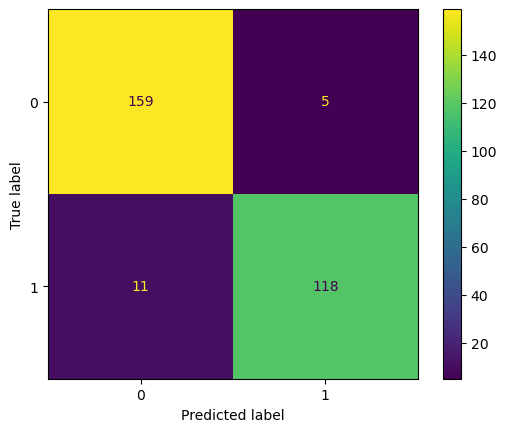

In [212]:
# Bagging Classifier model on the test set
y_pred = bag_clf.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bag_clf.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

0.9488054607508533
0.9451692191340517
0.9402390438247012


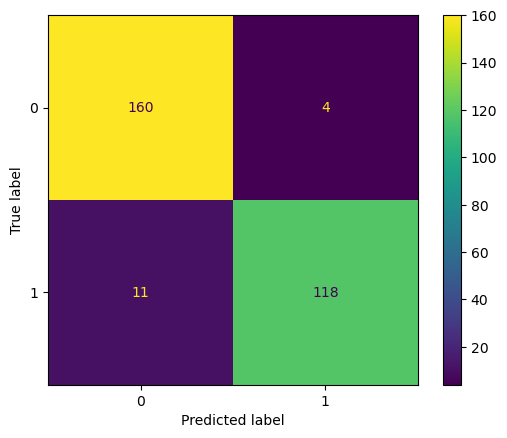

In [294]:
# Random Forest model on the test set
y_pred = rf_clf.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

0.9453924914675768
0.942120438646247
0.9365079365079365


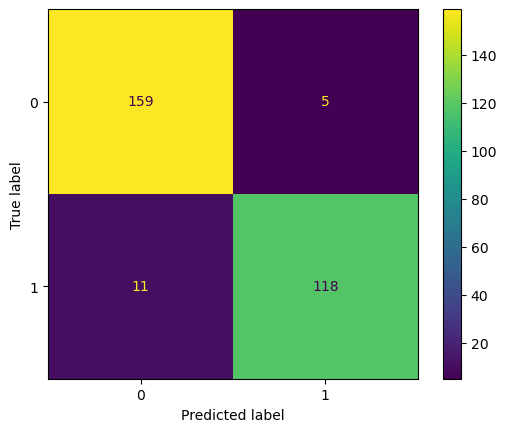

In [380]:
# Adaboost model on the test set
y_pred = ada_clf.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_clf.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

0.9419795221843004
0.939071658158442
0.932806324110672


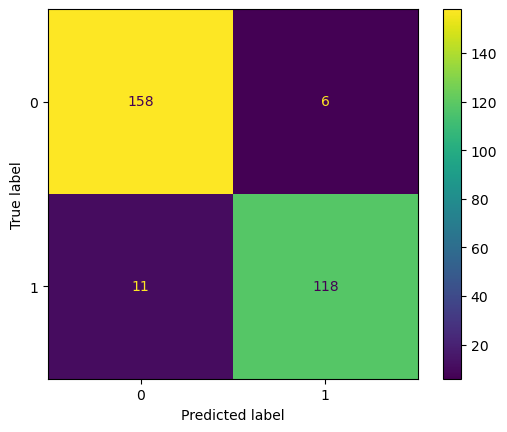

In [472]:
# XGBoost model on the test set
y_pred = xgb_clf.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

In [ ]:
# After running the models on the test set, the random forest model appears to perform the best. It reached an accuracy of 94.88 and f1 score of 94.02.
# This is surprising because it had the 3rd worst oob score/score. This did not match my hypothsis and in fact my hypothesis
# was flipped because XGBoost actually performed the worst out of all the models. 
# Each model is similar in how it classified the data. It seems the models biased no rain instead of rain. 
# I think this is because there is slight imbalance in the data where no rain has 169 instances and rain has 124 instances.
# Overall, each model performed pretty well with only a handful of misclassifications.